In [ ]:
from google.colab import drive
import numpy as np

# makes printing more human-friendly
np.set_printoptions(precision=3,suppress=True)

In [ ]:
# Load the data
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive')
    with open('/content/drive/MyDrive/Colab Notebooks/Ex_PC_metric.csv', 'r') as f:
      data = np.genfromtxt(f,delimiter=',')
else:
    with open('Ex_PC_metric.csv', 'r') as f:
        data = np.genfromtxt(f,delimiter=',')

labels = data[:,0]
print('labels', labels)
preds = data[:,1]
print('preds', preds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
labels [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
preds [0.035 0.05  0.071 0.1   0.139 0.191 0.191 0.256 0.334 0.422 0.515 0.607
 0.693 0.766 0.874 0.91  0.937 0.956 0.969 0.985]


In [ ]:
# Compute evaluation metrics for a threshold of 0.5
from sklearn.metrics import confusion_matrix

transformed_preds = (preds > 0.5).astype(int)
cm = confusion_matrix(labels, transformed_preds)
print('Confusion Matrix\n', cm)

TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print('\nTN, FP, FN, TP\n', TN, FP, FN, TP)

sens, spec = TP/(TP+FN), TN/(TN+FP)
print('\nsens, spec\n', sens, spec)

prec, recall = TP/(TP+FP), TP/(TP+FN)
print('\nprec, recall\n', prec, recall)

prob_miss, prob_false_alarm = FN/(TP+FN), FP/(FP+TN)
print('\nprob_miss, prob_false_alarm\n', prob_miss, prob_false_alarm)

Confusion Matrix
 [[8 2]
 [2 8]]

TN, FP, FN, TP
 8 2 2 8

sens, spec
 0.8 0.8

prec, recall
 0.8 0.8

prob_miss, prob_false_alarm
 0.2 0.2


Area under curve (AUC) =  0.895


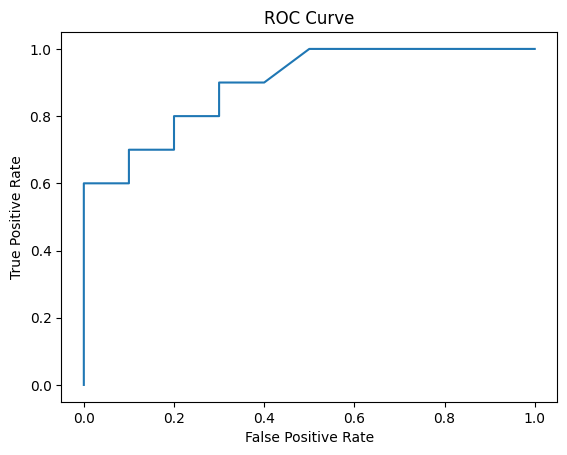

In [ ]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(labels, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print('Area under curve (AUC) = ', roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
if colab:
    drive.flush_and_unmount()